# Kaggle team name: vijf5!

# Members:
1. Jesse Coenraad -> JesseCoenraad
2. Jordan van Sintanneland -> JordanvanSint
3. Casper Priem -> CasperPriem
4. Jassar Hasiba -> UrClades

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.preprocessing import StandardScaler
from scipy import stats

# 1. Exploratieve Data Analyse (EDA)

In [5]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

### 1.1 Uitleg van iedere kolom

0: id: uniek id van het persoon

1: age: leeftijd

3: hypertension: hoge bloeddruk (0 is nee, 1 is ja)

4: heart_disease: hart- en vaatziekten (0 is nee, 1 is ja)

5: avg_glucose_level: gemiddeld glucoselevel gemeten in mmol/L

6: bmi: bmi van de persoon 

7: gender_female: geslacht (True or False)

8: Gender_other: People who identify as something other than male or female

9: Every_married_no: geeft aan wie er niet getrouwd is.

10: Every_married_yes: geeft aan wie er wel getrouwd is.

11: Work_type_Govt_job: geeft aan wie er een baan heeft die te maken heeft met veiligheid van de bevolking.

12: work_type_never_worked: mensen die nooit gewerkt hebben.

13: work_type_private_work: mensen die privé werk doen.

14: work_type_Self_employed: mensen die eigen baas zijn.

15: work_type_children: ?

16: Residence_type_rural: heeft de person een huis in een landelijk gebied. (True or False)

17: Residence_type_urban: heeft de persoon een huis in een stedelijk gebied. (True or False)

18: Smoking_status_formerly smoked: heeft de person in het verleden gerookt.  (True or False)

19: Smoking_status_never smoked: heeft de persoon ooit gerookt.  (True or False)

20: Smoking_status_smokes: Rookt de persoon momenteel actief.  (True or False)

21: Stroke: Heeft de persoon een beroerte gehad. (True or False)


### 1.2 Beschrijf in hoeverre de data voldoet aan de minimale vereisten voor Machine Learning met Scitkit Learn

In [6]:
display(train.head())
display(train.info())
display(train.describe())

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,stroke
0,52709,30.0,0,0,63.60,33.3,False,True,False,True,False,False,False,True,False,False,True,False,False,False,True,0
1,72295,75.0,1,0,215.17,48.0,True,False,False,False,True,False,False,False,True,False,True,False,False,True,False,0
2,26451,15.0,0,0,135.22,19.0,False,True,False,True,False,False,False,True,False,False,True,False,False,True,False,0
3,65210,47.0,0,0,64.89,28.2,False,True,False,False,True,False,False,False,True,False,False,True,False,True,False,0
4,69299,49.0,0,0,222.34,28.8,False,True,False,False,True,False,False,False,True,False,True,False,True,False,False,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33550 entries, 0 to 33549
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              33550 non-null  int64  
 1   age                             33550 non-null  float64
 2   hypertension                    33550 non-null  int64  
 3   heart_disease                   33550 non-null  int64  
 4   avg_glucose_level               33550 non-null  float64
 5   bmi                             33550 non-null  float64
 6   gender_Female                   33550 non-null  bool   
 7   gender_Male                     33550 non-null  bool   
 8   gender_Other                    33550 non-null  bool   
 9   ever_married_No                 33550 non-null  bool   
 10  ever_married_Yes                33550 non-null  bool   
 11  work_type_Govt_job              33550 non-null  bool   
 12  work_type_Never_worked          

None

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,33550.000000,33550.000000,33550.000000,33550.000000,33550.000000,33550.000000,33550.000000
mean,36746.393353,41.815312,0.088137,0.043040,103.587081,28.601216,0.015410
std,20906.519131,22.477423,0.283498,0.202951,42.127396,7.782248,0.123178
min,1.000000,0.080000,0.000000,0.000000,55.010000,10.100000,0.000000
25%,18763.250000,24.000000,0.000000,0.000000,77.460000,23.300000,0.000000
50%,36862.000000,43.000000,0.000000,0.000000,91.320000,27.700000,0.000000
75%,54757.500000,59.000000,0.000000,0.000000,111.437500,32.800000,0.000000
max,72943.000000,82.000000,1.000000,1.000000,281.590000,97.600000,1.000000


<Axes: >

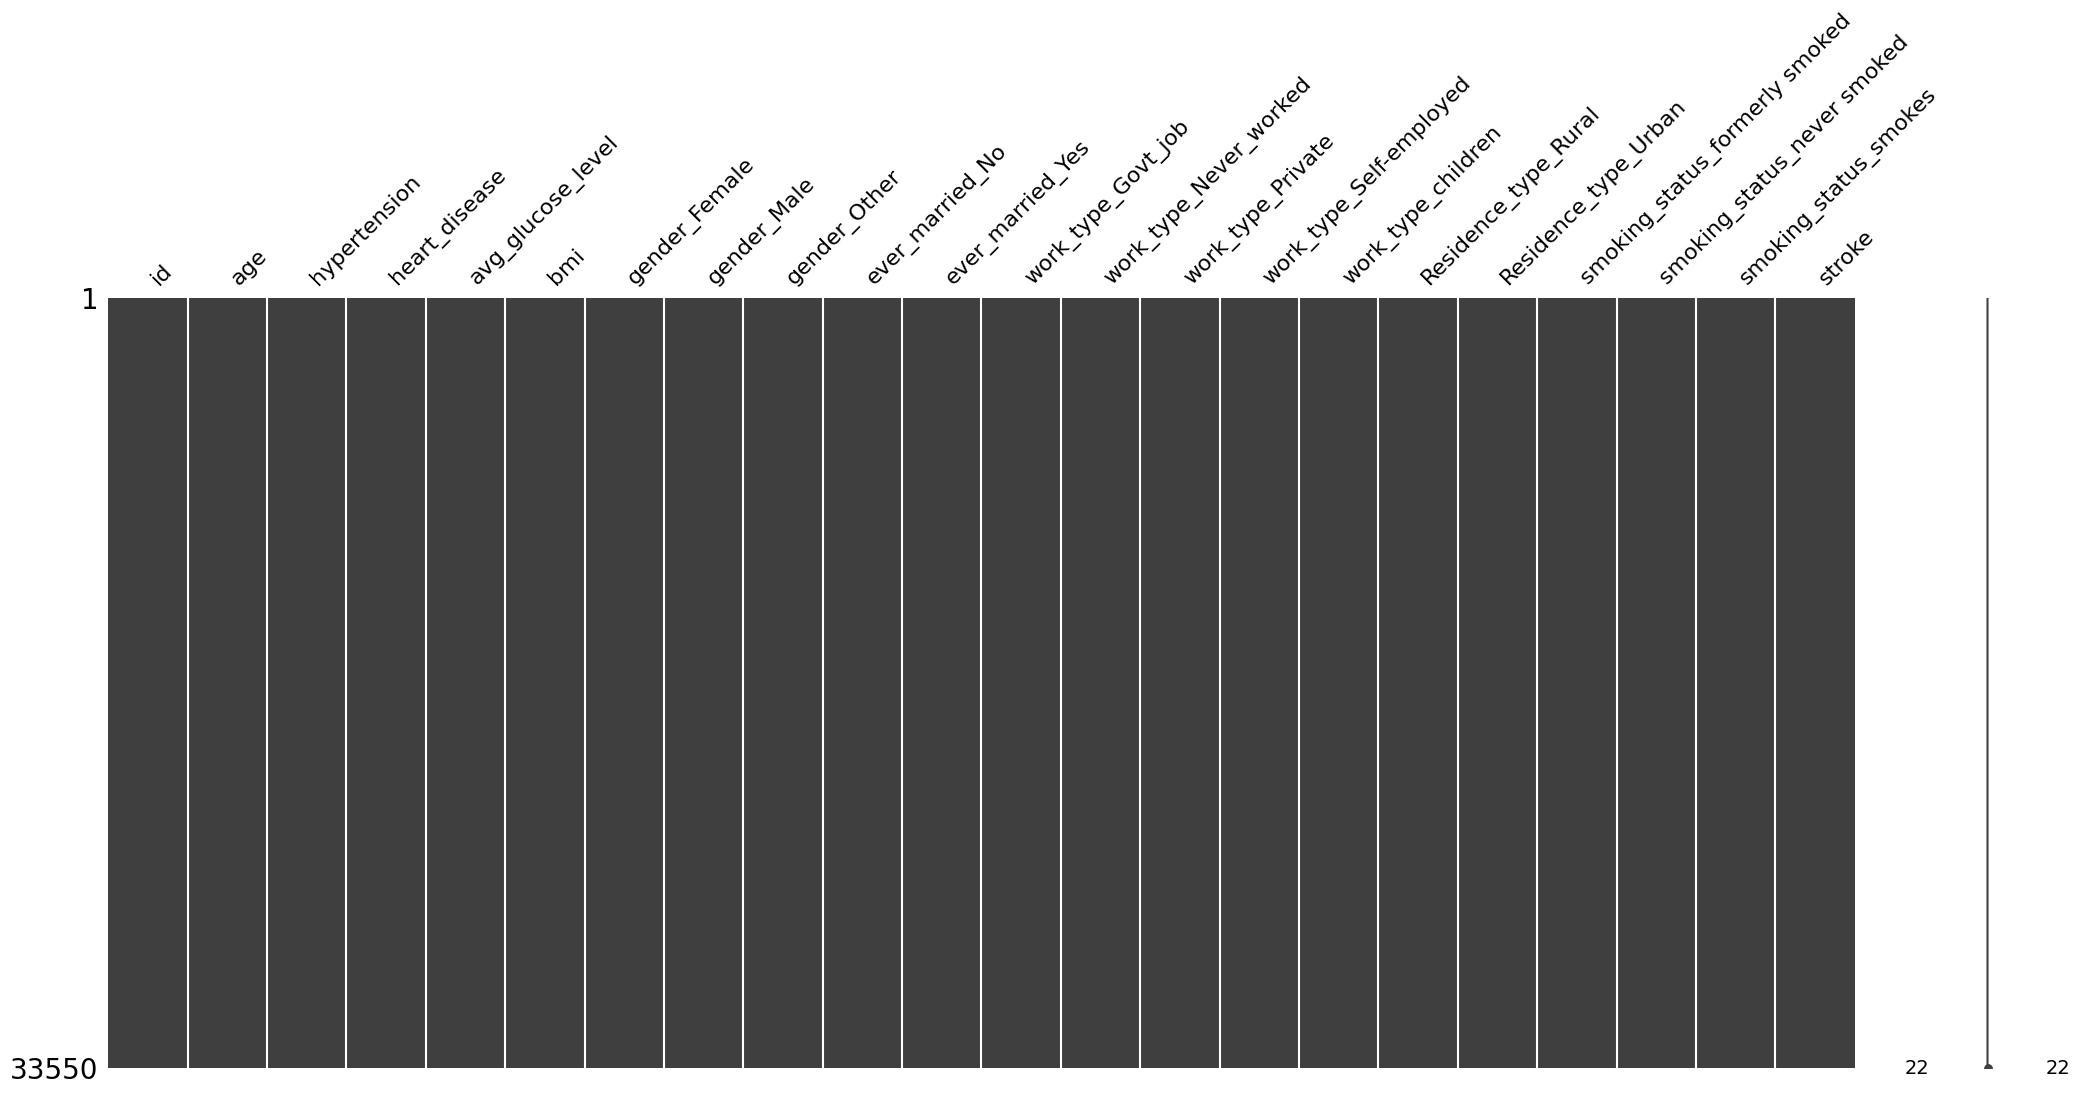

In [7]:
# Kijken of er missende data in de traindata zit
msno.matrix(train)

<Axes: >

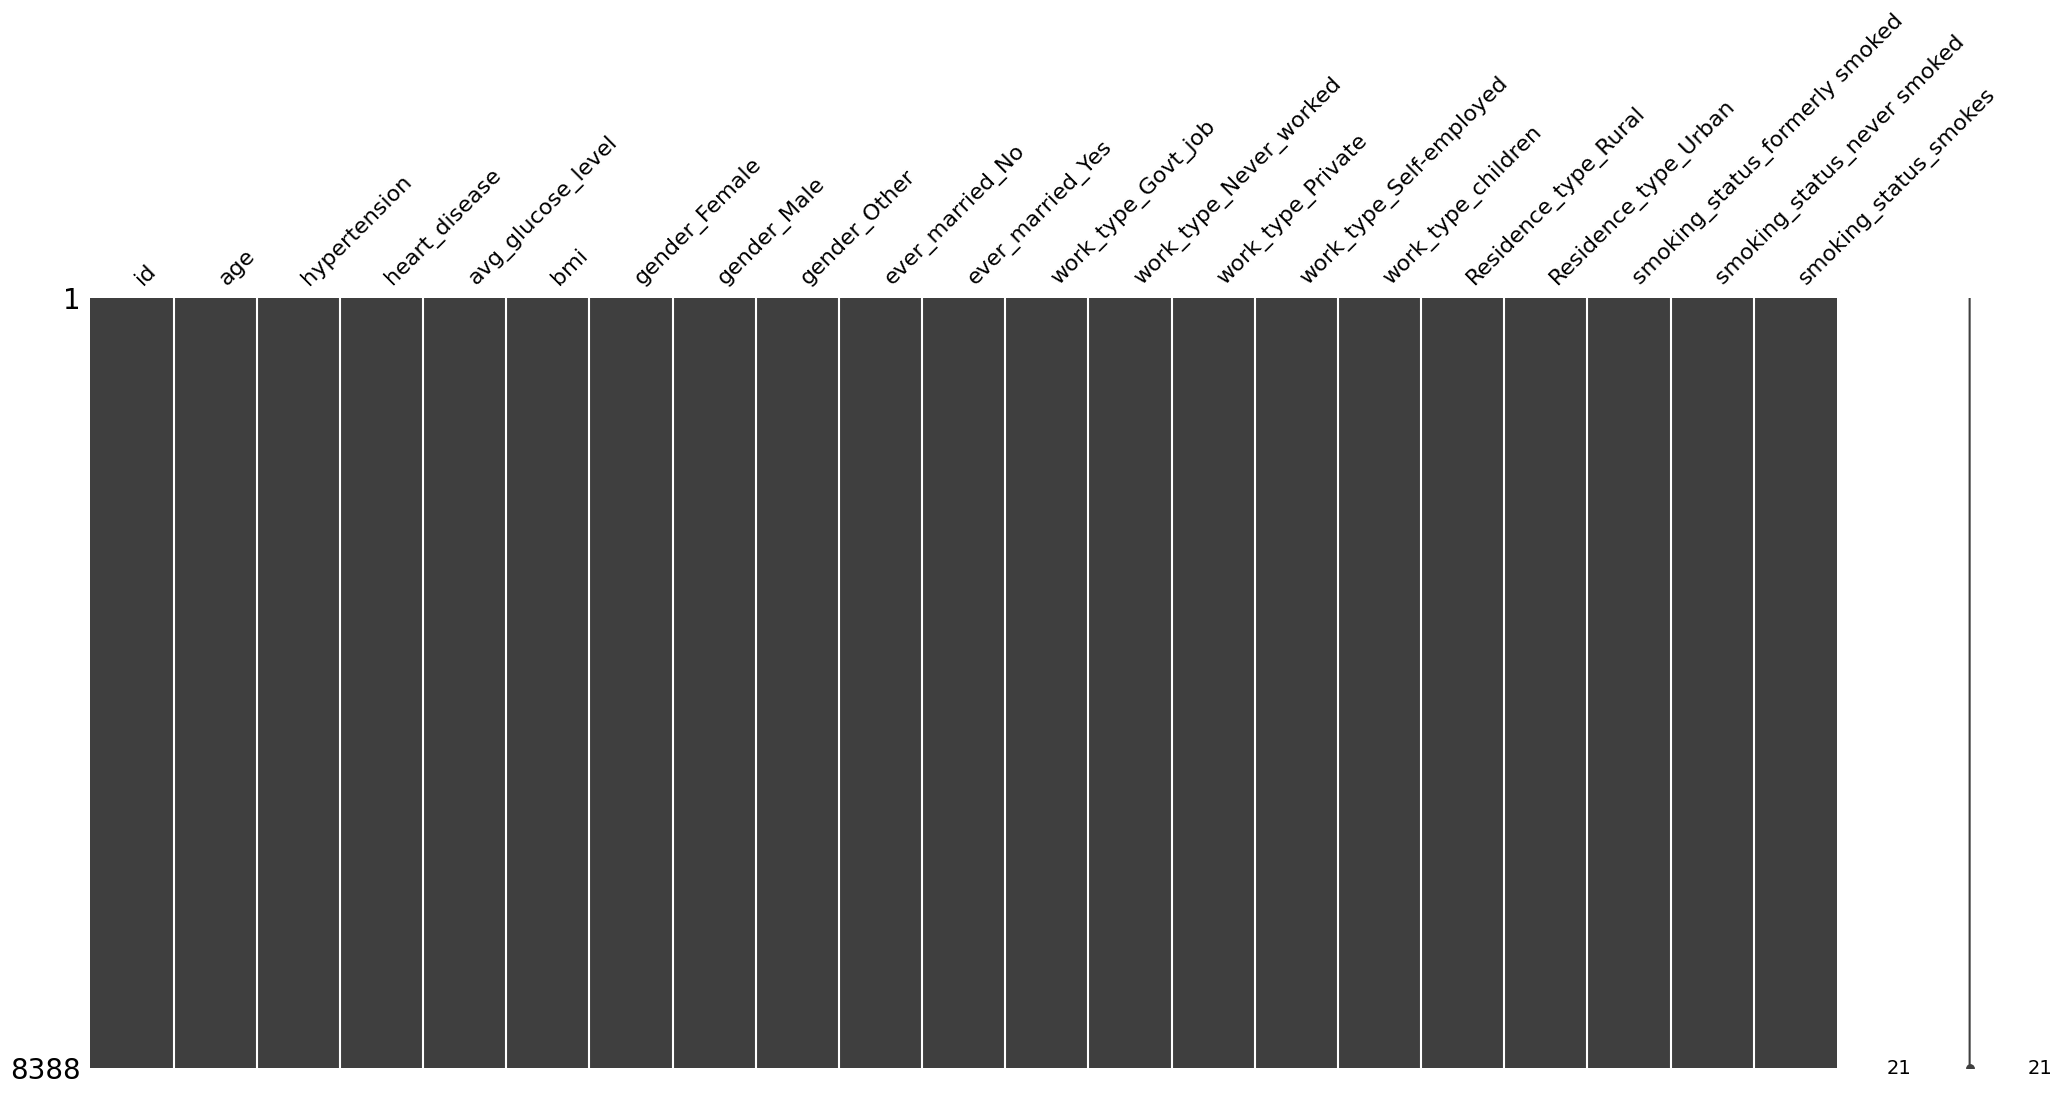

In [8]:
# Kijken of er missende data in de testdata zit
msno.matrix(test)

EDA: Voldoet aan de eisen, geen missende waarden etc.

### 1.2.1 maak de evenutele aanpassingen

In [6]:
# Booleans omzetten naar 0 en 1

#train = train.astype({col: int for col in train.columns if train[col].dtype == 'bool'})
#test = test.astype({col: int for col in test.columns if test[col].dtype == 'bool'})

### 1.3 Onderzoek de relaties tussen de onafhankelijke variabelen enerzijds en de afhankelijke variabele anderzijds. Gebruik hierbij passende visualisaties

<Axes: >

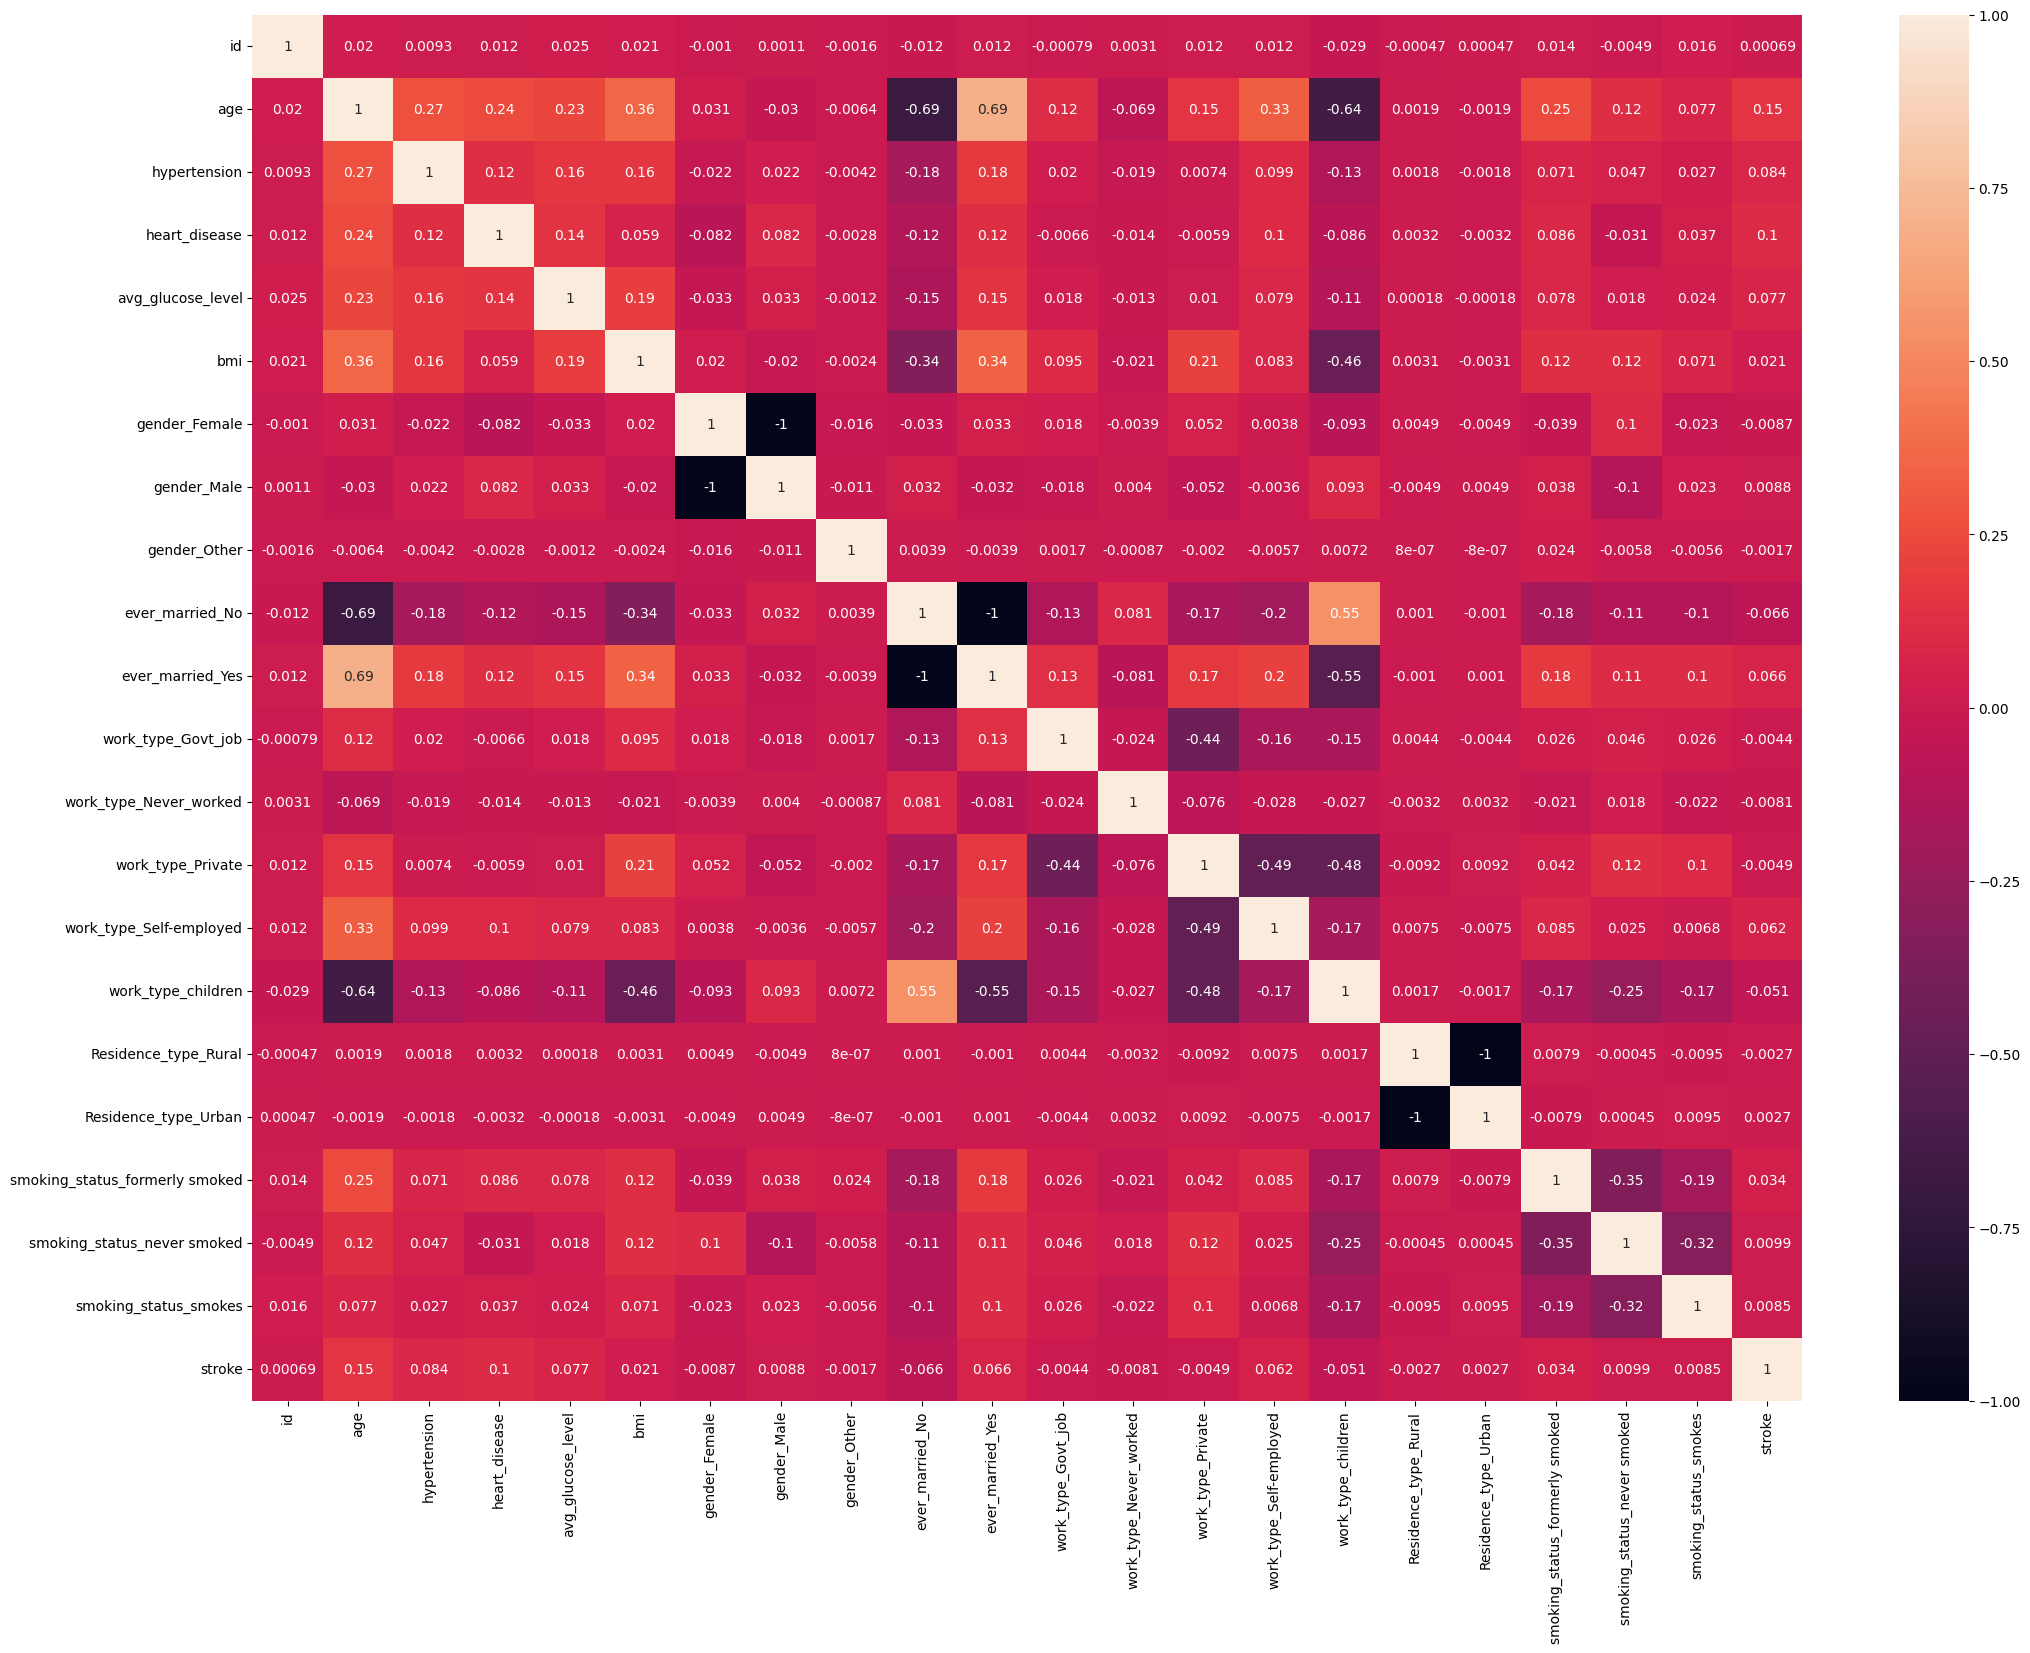

In [9]:
plt.figure(figsize=(25, 18))
sns.heatmap(train.corr(), annot=True)

In [10]:
cat_cols = train.drop(['id', 'age', 'avg_glucose_level', 'bmi'], axis=1)
num_cols = train[['age', 'avg_glucose_level', 'bmi']]

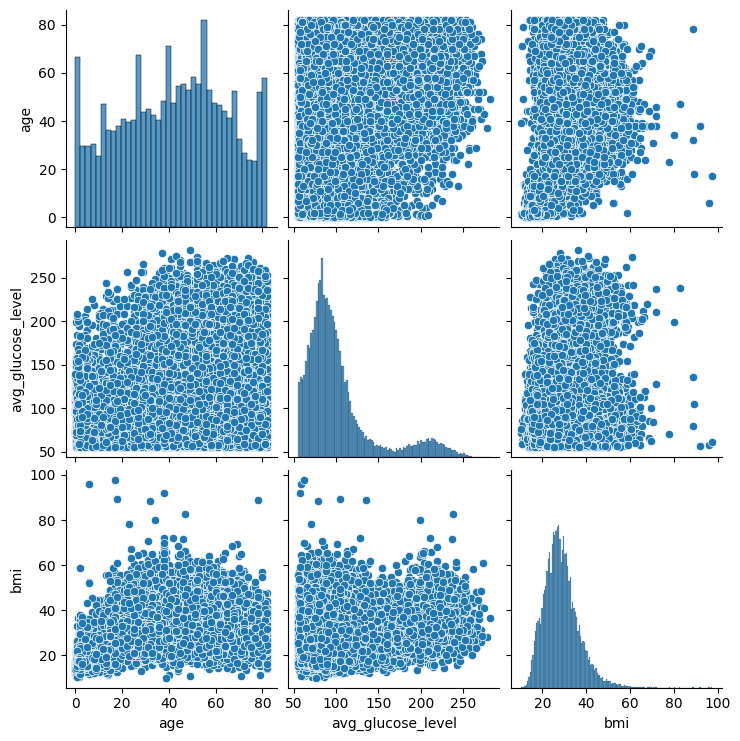

In [11]:
sns.pairplot(num_cols)
plt.show()

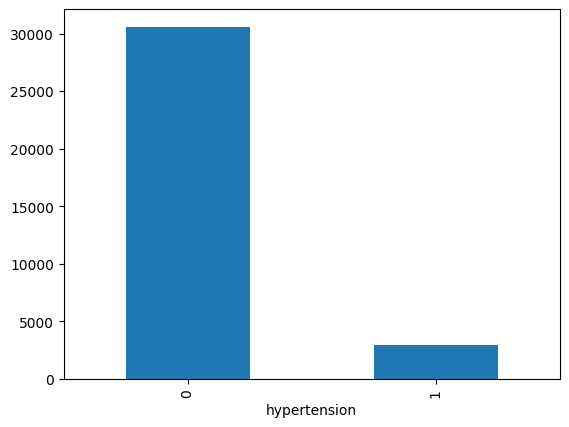

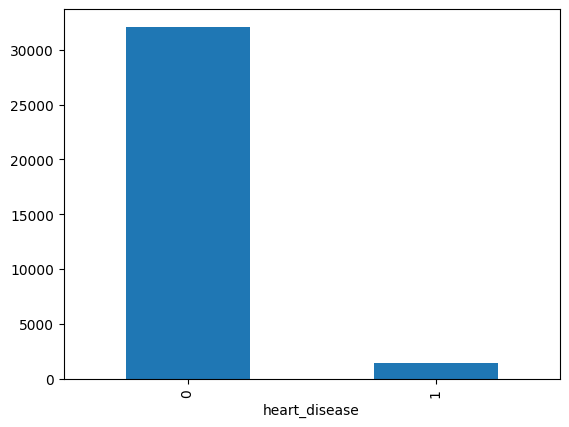

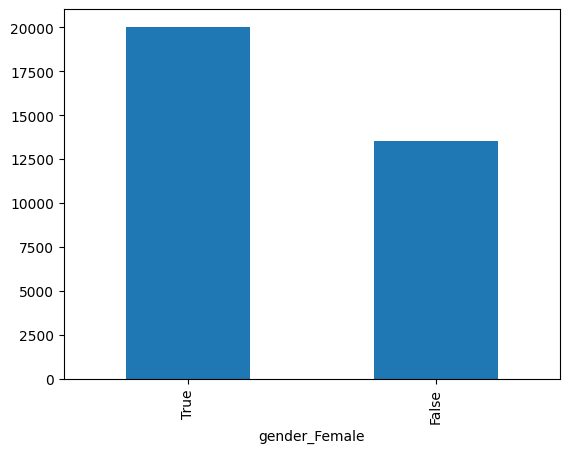

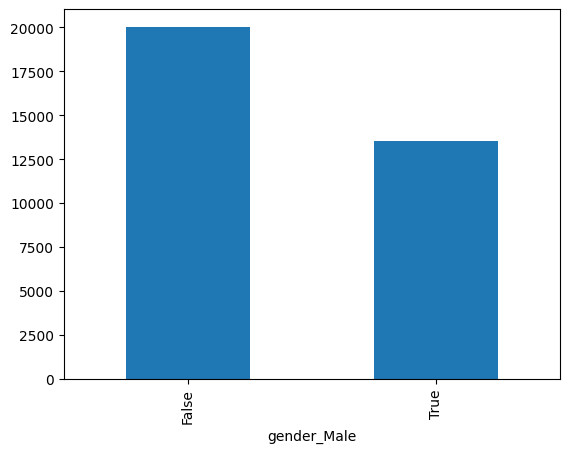

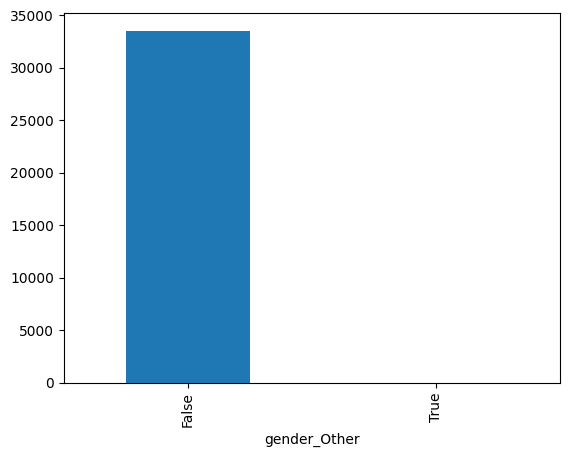

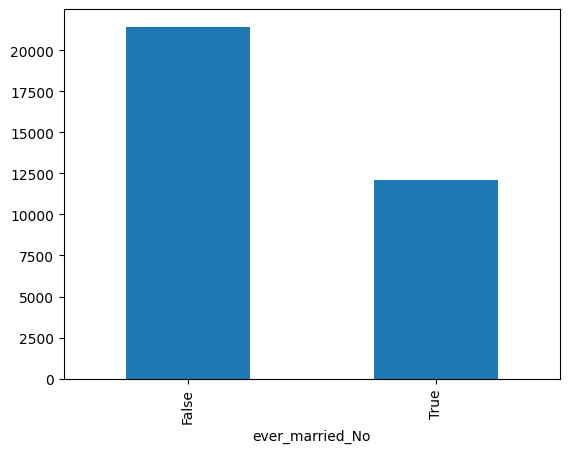

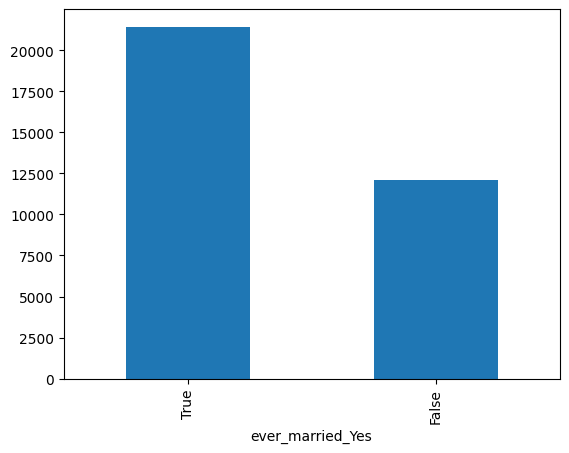

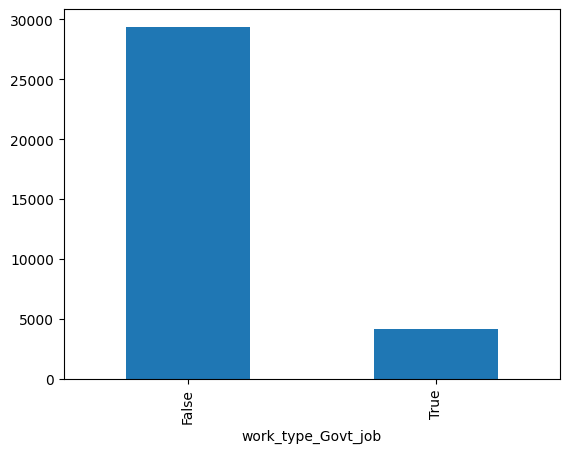

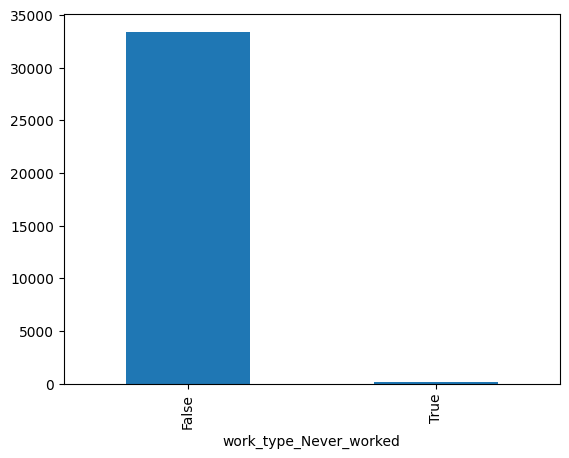

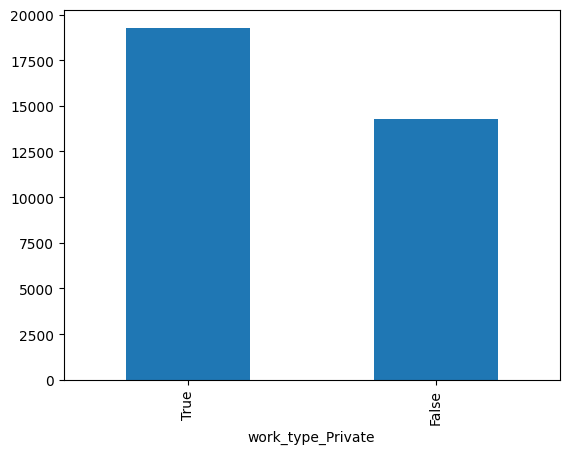

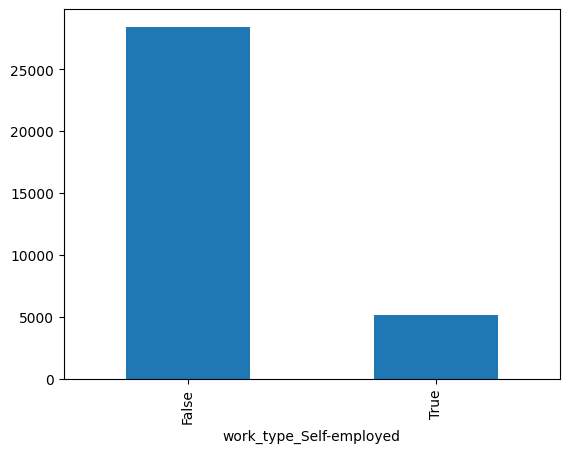

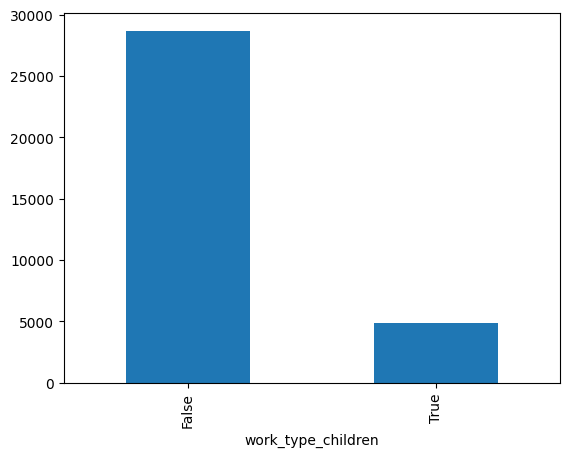

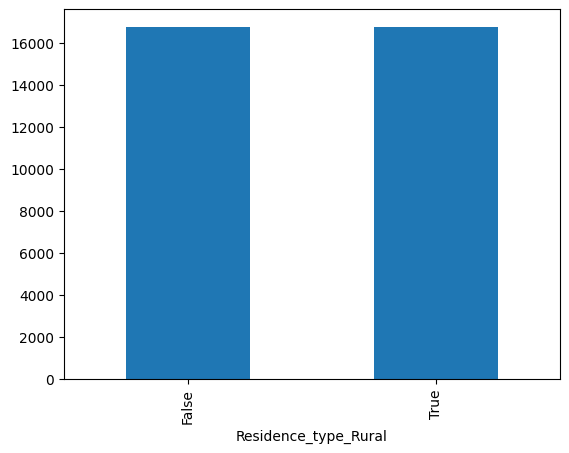

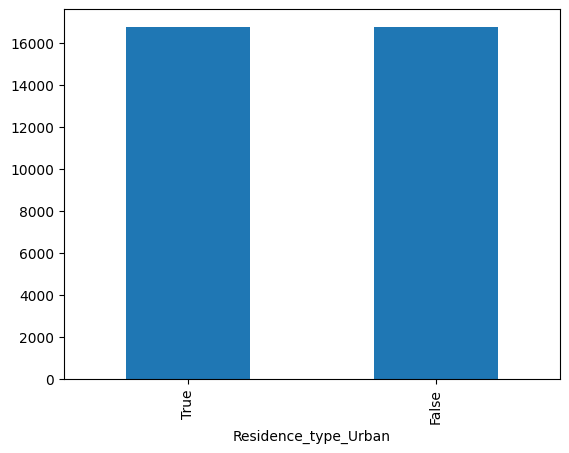

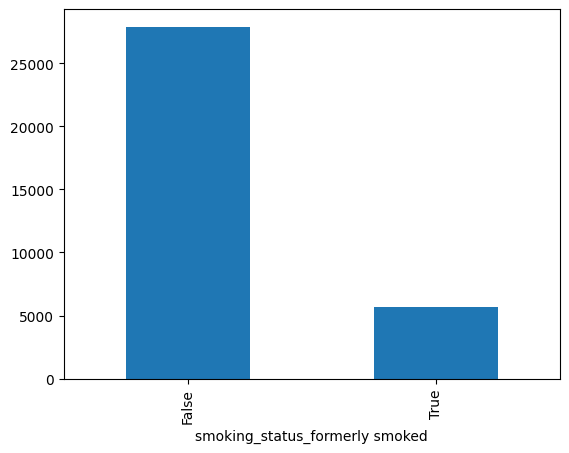

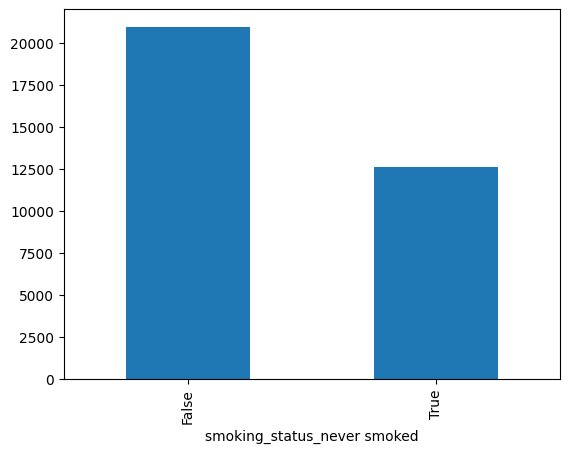

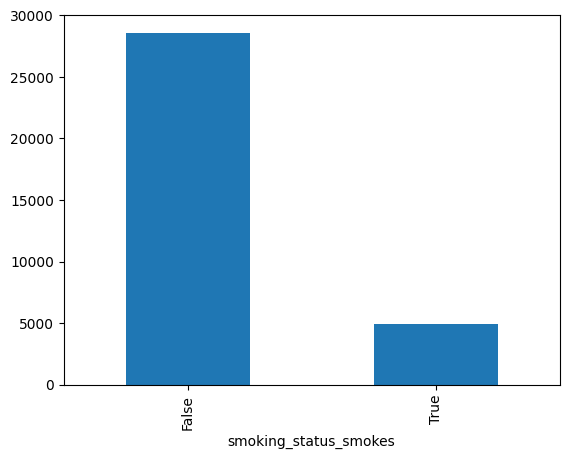

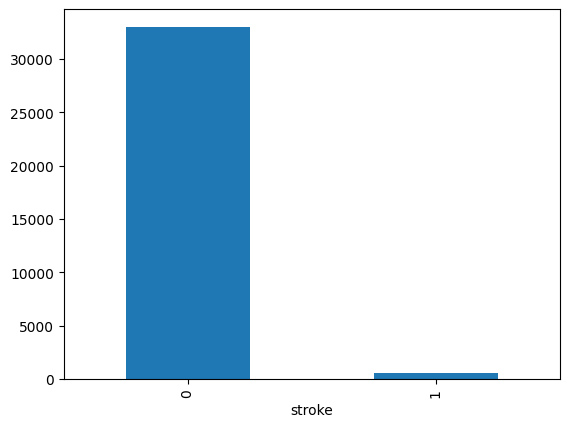

In [10]:
for i in cat_cols:
    train[i].value_counts().plot(kind='bar')
    plt.show()

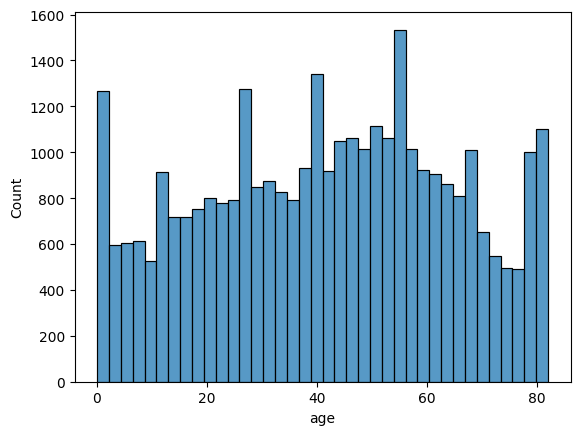

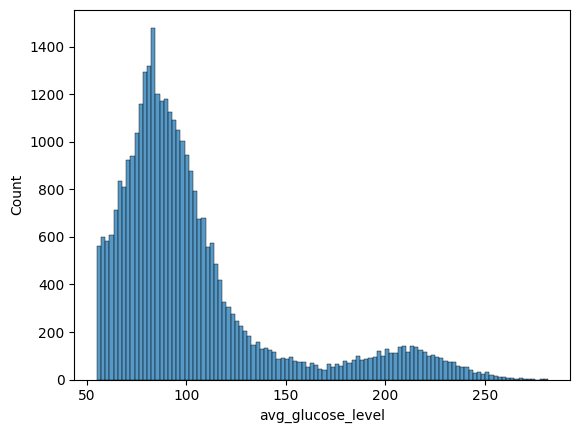

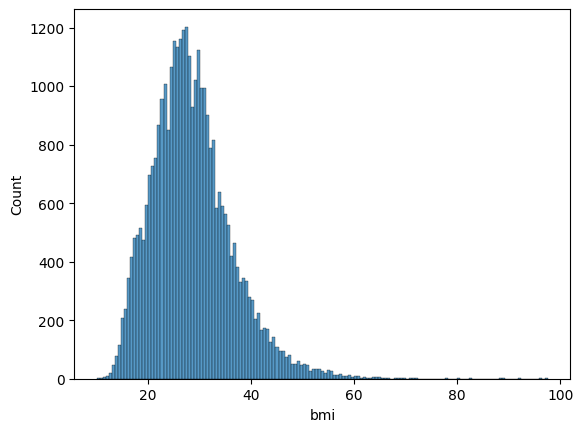

In [11]:
for i in num_cols:
    sns.histplot(x=train[i])
    plt.show()

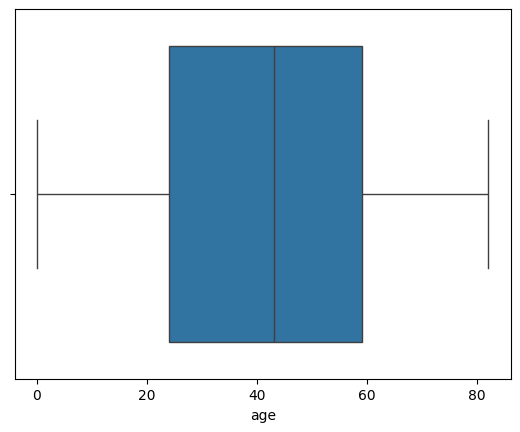

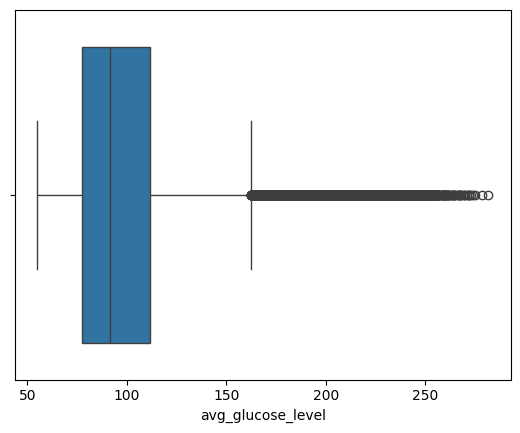

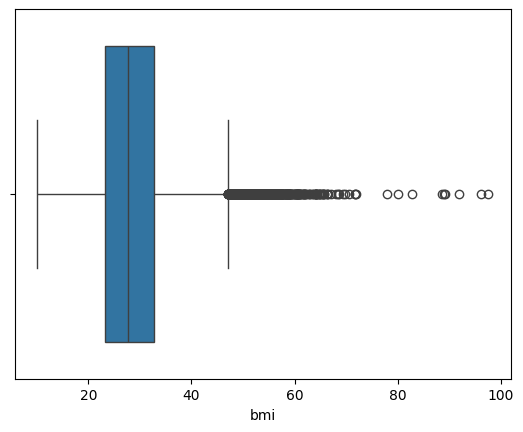

In [12]:
for i in num_cols:
    sns.boxplot(x=train[i])
    plt.show()

### 1.3.1 Omgaan met outliers

omdat extreme waardes bij age en 

In [13]:
#test_data_ids = test['id']

In [14]:
#num_cols = train[['bmi']]   # bmi heeft extreme outliers die niet mogelijk zijn terwijl extreem hoge avg_glucose_level waardes wel mogelijk zijn
#z_scores = np.abs(stats.zscore(num_cols))   # Z-scores berekenen
#outliers = np.where(z_scores > 3)   # Outliers vinden
#outliers_rows = num_cols[(z_scores > 3).any(axis=1)]   # Rijen met outliers vinden
#train = train.drop(outliers_rows.index)  # Rijen met outliers verwijderen
#train.drop(columns = ['gender_Male' , 'gender_Other' , 'ever_married_No' , 'Residence_type_Rural' , 'id'] , inplace = True) # Kolommen verwijderen die geen invloed hebben op de target
#train.rename(columns = {'gender_Female' : 'gender'} , inplace = True) # Kolom hernoemen, 1 = Female, 0= Male

In [15]:
#test.drop(columns = ['gender_Male' , 'gender_Other' , 'ever_married_No' , 'Residence_type_Rural' , 'id'] , inplace = True) # Kolommen verwijderen die geen invloed hebben op de target
#test.rename(columns = {'gender_Female' : 'gender'} , inplace = True) # Kolom hernoemen, 1 = Female, 0= Male

In [16]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 33206 entries, 0 to 33549
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   age                             33206 non-null  float64
 1   hypertension                    33206 non-null  int64  
 2   heart_disease                   33206 non-null  int64  
 3   avg_glucose_level               33206 non-null  float64
 4   bmi                             33206 non-null  float64
 5   gender                          33206 non-null  bool   
 6   ever_married_Yes                33206 non-null  bool   
 7   work_type_Govt_job              33206 non-null  bool   
 8   work_type_Never_worked          33206 non-null  bool   
 9   work_type_Private               33206 non-null  bool   
 10  work_type_Self-employed         33206 non-null  bool   
 11  work_type_children              33206 non-null  bool   
 12  Residence_type_Urban            33206

In [50]:
#from imblearn.over_sampling import SMOTE
#
#X = train.drop(columns=['stroke'])
#y = train['stroke']
#
#smote = SMOTE(random_state=0)
#X_resampled, y_resampled = smote.fit_resample(X, y)
#
#print(y_resampled.value_counts())

stroke
0    32691
1    32691
Name: count, dtype: int64


In [84]:
#from imblearn.under_sampling import InstanceHardnessThreshold
#
#
#X = train.drop(columns=['stroke'])
#y = train['stroke']
#
#iht = InstanceHardnessThreshold(random_state=42)
#X_resampled, y_resampled = iht.fit_resample(X, y)
#
#print(y_resampled.value_counts())

stroke
0    21711
1      515
Name: count, dtype: int64


In [100]:
#from imblearn.over_sampling import ADASYN
#
#X = train.drop(columns=['stroke'])
#y = train['stroke']
#
#oversample = ADASYN()
#X_resampled, y_resampled = oversample.fit_resample(X, y)
#
#print(y_resampled.value_counts())

stroke
0    32691
1    32529
Name: count, dtype: int64


### 1.4 Beschrijf de belangrijkste bevindingen van de EDA

### 1.5 Sommige regels en/of kolommen zijn soms niet relevant voor machine learning. Schoon de data op zodat alleen relevante regels resteren

### 1.6 Beschrijf wat wordt bedoeld met het standaardiseren van de data. Geef aan in welke gevallen dit gewenst is. Beargumenteer of het waarde toevoegt voor deze dataset en voer eventueel standaardisatie uit

In [85]:
#sc = StandardScaler()
#
#X_resampled = sc.fit_transform(X_resampled) 

# 2. Evaluatie

### 2.1 Geef aan met welke “metrics”, voor deze vorm van machine learning, bepaalt kan worden hoe goed een model presteert. Toon de uitkomsten op deze metrics aan de hand van een zelf te kiezen machine learning algoritm

### 2.2 Leg uit hoe iedere metric wordt berekend. Gebruik hierbij een confusion matrix

### 2.3 In de Kaggle competitie zie je dat er is gekozen voor de f1-score om te beoordelen hoe goed een model presteert. Leg uit waarom f1-score voor dit vraagstuk de beste maatstaf is

# 3. Modelleren en uitleg modellen

Pas cross-validation en hyperparameter tuning toe op ieder model.

Als je de beste hyperparameters voor een model hebt gevonden dan pas je het model met die hyperparameters toe op test.csv. De voorspellingen upload je op Kaggle om te zien hoe goed een model presteert.

De dataset is een “imbalanced dataset”. Leg uit waarom dit zo is. Er zijn meerdere technieken waarmee je voorspellingen voor zo’n dataset kunt verbeteren. Zonder toepassingvan deze technieken zullen je voorspellingen erg slecht zijn. Pas voor alle modellen ensembles minimaal 2 van deze technieken toe en leg uit hoe iedere techniek werk

## 3.1 KNN

#### 3.1.1 Leg uit hoe model werkt. Gebruik daarin onder andere termen “afstand”, “euclidean” en “manhattan

### 3.1.2 Leg uit waarom standaardisatie voor dit model van groot belang

### 3.1.3 Bepaal bij welke hyperparameters het model de beste resultaten geeft op degekozen metric

### 3.1.4 Leg uit hoe regularisatie werkt voor dit model

## 3.2 Logistic Regression

### 3.2.1 Leg uit hoe het model werkt

### 3.2.2 Toon de wiskundig formule voor de loss-functie en ligt deze toe

### 3.2.3 Leg uit wat gradient descent is in deze context. Leg dit uit aan de hand van een eenvoudig rekenvoorbeeld en geef hierbij de relevant wiskundige formules

### 3.2.4 Benoem de vormen van regularisatie die van toepassing zijn op dit model. Leg aan de hand van wiskundige formules uit hoe iedere vorm werkt en wat het effect is van iedere vorm

### 3.2.5 Beschrijf hoe regularisatie zich verhoudt ten opzichte van overfitting

### 3.2.6 Bepaal bij welke hyperparameters het model de beste resultaten geeft op degekozen metric

## 3.3 SVM

### 3.3.1 Beschrijf de werking van dit model. Toon hierbij de relevante wiskundige formules en leg ze uit aan de hand van een rekenvoorbeeld. Gebruik hierbij een klein deel van de dataset. Leg ook uit wat een kernel is en wat de kernel trick is

### 3.3.2 Toon de wiskundig formule voor de loss functie en ligt deze toe

### 3.3.3 Benoem de vormen van regularisatie die van toepassing zijn op dit model. Leg aan de hand van wiskundige formules uit hoe iedere vorm werkt en wat het effect is van iedere vorm

### 3.3.4 Bepaal bij welke hyperparameters het model de beste resultaten geeft op degekozen metric

## 3.4 Decision Tree

In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn import metrics 
from sklearn.metrics import classification_report, f1_score, confusion_matrix, ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN
from imblearn.under_sampling import InstanceHardnessThreshold


In [13]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

test_data_ids = test['id']

num_cols = train[['bmi']]   # bmi heeft extreme outliers die niet mogelijk zijn terwijl extreem hoge avg_glucose_level waardes wel mogelijk zijn
z_scores = np.abs(stats.zscore(num_cols))   # Z-scores berekenen
outliers = np.where(z_scores > 3)   # Outliers vinden
outliers_rows = num_cols[(z_scores > 3).any(axis=1)]   # Rijen met outliers vinden
train = train.drop(outliers_rows.index)  # Rijen met outliers verwijderen
train.drop(columns = ['gender_Male' , 'gender_Other' , 'ever_married_No' , 'Residence_type_Rural' , 'id'] , inplace = True) # Kolommen verwijderen die geen invloed hebben op de target
train.rename(columns = {'gender_Female' : 'gender'} , inplace = True) # Kolom hernoemen, 1 = Female, 0= Male

test.drop(columns = ['gender_Male' , 'gender_Other' , 'ever_married_No' , 'Residence_type_Rural' , 'id'] , inplace = True) # Kolommen verwijderen die geen invloed hebben op de target
test.rename(columns = {'gender_Female' : 'gender'} , inplace = True) # Kolom hernoemen, 1 = Female, 0= Male

X = train.drop(columns=['stroke'])
y = train['stroke']

smote = SMOTE(random_state=0)
X_resampled, y_resampled = smote.fit_resample(X, y)

print(y_resampled.value_counts())

sc = StandardScaler()

X_resampled = sc.fit_transform(X_resampled) 

stroke
0    32691
1    32691
Name: count, dtype: int64


In [14]:
X_train, X_test, y_train, y_test= train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

dt = DecisionTreeClassifier(criterion='entropy', splitter = 'best', max_depth = 16, min_samples_split = 2, min_samples_leaf = 1, max_features = 12, random_state=42)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
print("F1 Score:", metrics.f1_score(y_test, y_pred))

#Beste kaggle score tot nu toe: 0.04147 (met smote)
#dt = DecisionTreeClassifier(criterion='entropy', splitter = 'best', max_depth = 16, min_samples_split = 2, min_samples_leaf = 1, max_features = 12, random_state=42)



F1 Score: 0.964436832560951


In [15]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96      9789
           1       0.95      0.97      0.96      9826

    accuracy                           0.96     19615
   macro avg       0.96      0.96      0.96     19615
weighted avg       0.96      0.96      0.96     19615



In [24]:
#CSV aanmaken om in Kaggle te uploaden

Decision_pred = dt.predict(test)
Decision_pred_df = test_data_ids.to_frame()
Decision_pred_df['stroke'] = Decision_pred
Decision_pred_df.to_csv('Decision_pred_23.csv', index=False)

### 3.4.1 Beschrijf de werking van dit model

Een decision tree is een model die op basis van een boomdiagram een class voorspelt. Dit wordt gedaan door middel van een reeks beslissingen. Elke "node" boom stelt een vraag over een feature van de data en op basis daarvan ga je een stap verder in de beslisboom. Dit gaat zo door tot je uiteindelijk bij de leafes van de boom komt die de voorspeelde uitkomst / class aangeven. 


### 3.4.2 Beschrijf de criteria op basis waarvan de splitsingen in de beslisboon kunnen worden gemaakt

Bij een decision tree is het van cruciaal belang dat er wordt bepaald op welke features er gesplitst moet worden en hoe deze vervolgens gemaakt moeten worden. Dit wordt gebaseerd op verschillende maatstaven. Twee opties zijn:

Information gain:

Entropie meet de mate van onzuiverheid in de data. Het geeft aan hoe gevarieerd de klassen zijn in een dataset.

Als de dataset puur is (alle voorbeelden behoren tot dezelfde klasse), is de entropie laag (0).
Als de dataset perfect gemengd is (gelijke aantallen voorbeelden van elke klasse), is de entropie hoog (maximaal).

Information gain is het verschil in entropie voor en na het splitsen van de data op een bepaald kenmerk. Het geeft aan hoeveel informatie je "wint" door die specifieke splitsing te maken. Als het de information gain hoger is, is het beter om op dit model te splitsen.

In elke stap van het bouwen van de decision tree, wordt voor elk kenmerk de information gain berekend. Het kenmerk met de hoogste information gain wordt gekozen om de data op te splitsen, omdat het de grootste vermindering in entropie geeft. Dit blijft worden gedaan tot er uiteindelijk geen nieuwe splitsingen meer kunnen worden gemaakt (of als er geen verbetering in het model meer mogelijk is)



Gini Impurity:

De Gini-Impurity is nog een maatstaf die vaak wordt gebruikt om te bepalen welke splitsing het beste is bij het bouwen van een decision tree classifier. In plaats van dat er entropie wordt gebruikt, meet deze maatstaaf de kans dat een willekeurig gekozen voorbeeld onjuist zou worden geclassificeerd op basis van de verdeling van de klassen in de dataset. 

Bij elke stap van het proces van een decision tree wordt de Gini-Impurity voor elk mogelijke splitsing berekend. Vervolgens kiest het model de splitsing die de grootste reductie in Gini-Impurity oplevert. Dit houdt in dat de data na elke splitsing zuiverder wordt. 
Bij elke stap in het bouwproces van een decision tree berekent het algoritme de Gini-impurity voor de huidige 


Ook dit proces wordt herhaald voor elke stuk van de data, waarbij de boom steeds verder wordt opgesplitst totdat de Gini-impurity voor de "leafs" laag genoeg is of totdat er geen verdere splitsingen meer nodig zijn. 

https://medium.com/@arpita.k20/gini-impurity-and-entropy-for-decision-tree-68eb139274d1 <br>
https://victorzhou.com/blog/information-gain/ <br>
https://victorzhou.com/blog/gini-impurity/ <br>


### 3.4.3 Bepaal bij welke hyperparameters het model de beste resultaten geeft op degekozen metric

In [30]:
dt = DecisionTreeClassifier(random_state=42)
param_grid = {'criterion': ['gini', 'entropy'],'splitter': ['best', 'random'], 'max_depth': [1,2,3,4,5,6,7,8,], 'min_samples_split': [1,2,3,4,5], 'min_samples_leaf': np.arange[1,2,3,4,5], 'max_features': np.arange(1,16)}
dt_cv = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, scoring='f1', n_jobs=-1)
dt_cv.fit(X, y) 

dt_cv.best_params_, dt_cv.best_score_


TypeError: 'builtin_function_or_method' object is not subscriptable

### 3.4.4 Leg uit wat ‘pruning’ is en beschrijf welke vormen hiervan zijn toegepast. Leg de relatie tussen ‘pruning’ en ‘underfitting / overfitting’ uit

Pruning is een techniek die wordt gebruikt om decision trees te vereenvoudigen en overfitting te voorkomen. Een model is overfit wanneer het te goed past op de trainingsdata, maar slecht resulteert / generaliseert op nieuwe data. Bij pruning worden overbodige delen van de decision tree die weinig of geen toegevoegde waarde hebben voor de voorspelling verwijdert. Dit vereenvoudigt het model, zodat het beter presteert op nieuwe data en dus minder zal overfitten. 

In ons model maken we gebruik van pre-pruning. Dit betekent het "groeiproces" van de boom vroegtijdig wordt gestopt, voordat de boom volledig is gesplistst. Dit hebben we gedaan aan de hand van vooraf bepaalde parameters (die we hebben berekend met de gridsearch). 

De methoden die wij hebben gebruikt zijn: 

-Max_depth: Het proces stopt wanneer de boom een bepaalde diepte bereikt. Diepere bomen kunnen overfitting veroorzaken, dus een maximale diepte beperken voorkomt dit.<br>
-Min_samples_split: dit is het aantal samples dat minimaal nodig is om een "node" te splitten. Bij te weinig samples zal de tree dus neit verder doorgroeien.<br>
-Min_samples_leaf: het minimaal aantal samples dat een "leaf" moet hebben. Ook dit help met de grootte van de decision tree. 

Relatie tussen Pruning en Underfitting / Overfitting:

Overfitting: een decision tree is overfit, wanneer het teveel leert van de trainingsdata en dus slecht generaliseert op nieuwe data. Door middel van pre-pruning wordt overfitting vermindert, door de bovenstaande technieken toe te passen. <br>

Underfitting: het kan ook zo zijn dat je een model underfit door gebruik te maken van pre-pruning. Als je niet een gridsearch doet en dus niet de juiste parameters gebruikt bij het trainen van een model, kan het zijn dat je het model te simpel maakt en het dus niet in staat is om dingen goed te voorspellen. 

https://medium.com/@abhishekjainindore24/pre-pruning-and-post-pruning-in-decision-trees-a-comprehensive-guide-391fd3682883 <br>
https://scikit-learn.org/dev/modules/generated/sklearn.tree.DecisionTreeClassifier.html




## 3.5 Ensembles  (Random Forest, Gradient Boosted Boosted Decistion Trees en XGboost)

In [26]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

test_data_ids = test['id']

num_cols = train[['bmi']]   # bmi heeft extreme outliers die niet mogelijk zijn terwijl extreem hoge avg_glucose_level waardes wel mogelijk zijn
z_scores = np.abs(stats.zscore(num_cols))   # Z-scores berekenen
outliers = np.where(z_scores > 3)   # Outliers vinden
outliers_rows = num_cols[(z_scores > 3).any(axis=1)]   # Rijen met outliers vinden
train = train.drop(outliers_rows.index)  # Rijen met outliers verwijderen
train.drop(columns = ['gender_Male' , 'gender_Other' , 'ever_married_No' , 'Residence_type_Rural' , 'id'] , inplace = True) # Kolommen verwijderen die geen invloed hebben op de target
train.rename(columns = {'gender_Female' : 'gender'} , inplace = True) # Kolom hernoemen, 1 = Female, 0= Male

test.drop(columns = ['gender_Male' , 'gender_Other' , 'ever_married_No' , 'Residence_type_Rural' , 'id'] , inplace = True) # Kolommen verwijderen die geen invloed hebben op de target
test.rename(columns = {'gender_Female' : 'gender'} , inplace = True) # Kolom hernoemen, 1 = Female, 0= Male

X = train.drop(columns=['stroke'])
y = train['stroke']

oversample = ADASYN()
X_resampled, y_resampled = oversample.fit_resample(X, y)

print(y_resampled.value_counts())

sc = StandardScaler()

X_resampled = sc.fit_transform(X_resampled) 

stroke
0    32691
1    32529
Name: count, dtype: int64


In [29]:
rf = RandomForestClassifier(random_state=42)
param_grid = {'n_estimators': np.arange(1,10),'criterion': ['gini', 'entropy'], 'max_depth': np.arange(1,10), 'min_samples_split': [1,2,3,6,9], 'min_samples_leaf': [1,2,3,6,9], 'max_features': ['sqrt']}
rf_cv = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='f1', n_jobs=-1)
rf_cv.fit(X, y) 

rf_cv.best_params_, rf_cv.best_score_




KeyboardInterrupt: 

In [17]:
X_train, X_test, y_train, y_test= train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

rf = RandomForestClassifier(n_estimators=1, criterion='entropy', max_depth=15, min_samples_split=2, min_samples_leaf=1, max_features='sqrt', random_state=42)

rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

print("F1 Score:", metrics.f1_score(y_test, y_pred))

#rf = RandomForestClassifier(n_estimators=1, criterion='entropy', max_depth=15, min_samples_split=2, min_samples_leaf=1, max_features='sqrt'. random_state=42)
#Beste kaggle score tot nu toe: 0.04503 (Adasyn Sampling)


F1 Score: 0.9395535490343617


In [18]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.92      0.94      9768
           1       0.92      0.96      0.94      9798

    accuracy                           0.94     19566
   macro avg       0.94      0.94      0.94     19566
weighted avg       0.94      0.94      0.94     19566



In [29]:
rf_pred = rf.predict(test)
rf_pred_df = test_data_ids.to_frame()
rf_pred_df['stroke'] = rf_pred
rf_pred_df.to_csv('rf_pred_9.csv', index=False)

Gradient Boosting


In [25]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

test_data_ids = test['id']

num_cols = train[['bmi']]   # bmi heeft extreme outliers die niet mogelijk zijn terwijl extreem hoge avg_glucose_level waardes wel mogelijk zijn
z_scores = np.abs(stats.zscore(num_cols))   # Z-scores berekenen
outliers = np.where(z_scores > 3)   # Outliers vinden
outliers_rows = num_cols[(z_scores > 3).any(axis=1)]   # Rijen met outliers vinden
train = train.drop(outliers_rows.index)  # Rijen met outliers verwijderen
train.drop(columns = ['gender_Male' , 'gender_Other' , 'ever_married_No' , 'Residence_type_Rural' , 'id'] , inplace = True) # Kolommen verwijderen die geen invloed hebben op de target
train.rename(columns = {'gender_Female' : 'gender'} , inplace = True) # Kolom hernoemen, 1 = Female, 0= Male

test.drop(columns = ['gender_Male' , 'gender_Other' , 'ever_married_No' , 'Residence_type_Rural' , 'id'] , inplace = True) # Kolommen verwijderen die geen invloed hebben op de target
test.rename(columns = {'gender_Female' : 'gender'} , inplace = True) # Kolom hernoemen, 1 = Female, 0= Male

X = train.drop(columns=['stroke'])
y = train['stroke']

oversample = ADASYN()
X_resampled, y_resampled = oversample.fit_resample(X, y)

print(y_resampled.value_counts())

sc = StandardScaler()

X_resampled = sc.fit_transform(X_resampled) 

stroke
0    32691
1    32529
Name: count, dtype: int64


In [114]:
gbc = GradientBoostingClassifier(random_state=42)
param_grid = {'loss': ['log_loss', 'exponential'], 'learning_rate': [0.1], 'n_estimators': np.arange(1,10),'criterion': ['friedman_mse', 'squared_error'], 'max_depth': [1,2,3,4,5,6,7,8,9,10], 'min_samples_split': np.arange(1,7), 'min_samples_leaf': np.arange(1,7), 'max_features': ['sqrt']}
gbc_cv = GridSearchCV(estimator=gbc, param_grid=param_grid, cv=5, scoring='f1', n_jobs=-1)
gbc_cv.fit(X, y) 

gbc_cv.best_params_, gbc_cv.best_score_


c:\Users\jesse\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
13200 fits failed out of a total of 79200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
13200 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\jesse\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\jesse\anaconda3\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\Users\jesse\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "c:\Users\jesse\anaconda3\Lib\site-

({'criterion': 'friedman_mse',
  'learning_rate': 0.1,
  'loss': 'log_loss',
  'max_depth': 10,
  'max_features': 'sqrt',
  'min_samples_leaf': np.int64(1),
  'min_samples_split': np.int64(6),
  'n_estimators': np.int64(6)},
 np.float64(0.052683041104482506))

In [20]:
X_train, X_test, y_train, y_test= train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

gbc = GradientBoostingClassifier(loss = 'log_loss', learning_rate = 0.1, n_estimators = 7, criterion = 'friedman_mse', min_samples_split = 2, min_samples_leaf = 1, max_depth = 8, max_features = 'sqrt', random_state=42)

gbc.fit(X_train, y_train)
y_pred = gbc.predict(X_test)

print("F1 Score:", metrics.f1_score(y_test, y_pred))

#gbc = GradientBoostingClassifier(loss = 'log_loss', learning_rate = 0.1, n_estimators = 7, criterion = 'friedman_mse', min_samples_split = 2, min_samples_leaf = 1, max_depth = 8, max_features = 'sqrt', random_state=42)

#Kaggle best score: 0.09090 (adasys)


F1 Score: 0.9173835581572919


In [21]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.91      0.92      9768
           1       0.92      0.92      0.92      9798

    accuracy                           0.92     19566
   macro avg       0.92      0.92      0.92     19566
weighted avg       0.92      0.92      0.92     19566



In [22]:
gbc_pred = gbc.predict(test)
gbc_pred_df = test_data_ids.to_frame()
gbc_pred_df['stroke'] = gbc_pred
gbc_pred_df.to_csv('gbc_pred_19.csv', index=False)

c:\Users\jesse\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  warnings.warn(


In [24]:
data_gbc = pd.read_csv('gbc_pred_13.csv')

data_gbc['stroke'].value_counts()

stroke
0    7550
1     838
Name: count, dtype: int64

XG Boost

<strong> Random Forest </strong>

Random forest is gebaseerd op bagging. Bij bagging worden meerdere versies van hetzelfde model getraind op verschillende subsets van de dataset (datapunten maken, met "terugleggen"). Doordat de trees onafhankelijk van elkaar worden getrained, kunnen ze parallel worden verwerkt. Hierdoor is de trainingstijd dus relatief snel.  Na het trainen van elke tree, wordt de uiteindelijke voorspelling gemaakt door het gemiddelde te pakken bij regressie of de meerderheid van stemmen bij classificatie (dus welke class het vaakste is voorspeld).

<strong> Gradient Descent Boosting </strong>

Boosting is een net andere manier van modellen trainen, aangezien dit sequentieel wordt gedaan in plaats van parallel. Dit betekent dat je ze sequentieel traint en elk volgend model dus leert van de fouten van het vorige model om zich zo dus te verbeteren. De samples die verkeerd zijn voorspeld, worden dus zwaarder meegenomen bij het trainen van het model erna. De focus ligt dus echt op moeilijk te voorspellen datapunten. Door het sequentieel trainen, kost het trainen van zo een model dus relatief veel tijd in vergelijking met een random forest.

### 3.5.1 Beschrijf de werking van de 3 genoemde ensembles. Gebruik daarbij o.a. de termen “bagging (bootstrap aggregation)” en “boosting “. Leg daarbij uit welke ensembles relatief veel trainingstijd nodig hebben en welke weinig tijd. Gebruik daarbij o.a. de termen “sequential” en “parallel"

### 3.5.2 Bepaal bij welke hyperparameters ieder ensemble de beste resultaten geeft op de gekozen metric.

## 3.6 Zelf samengesteld ensemble

Ensemble dient te bestaan uit minimaal drie modellen

### 3.6.1 Leg uit hoe een ensemble werkt en beschrijf welke vorm van “voting” je hebtgekozen en waarom

### 3.6.2 Leg uit waarom je hebt gekozen voor de modellen in je ensemble

### 3.6.3 Bepaal bij welke hyperparameters het model de beste resultaten geeft op degekozen metric

# 4. Conclusie en advies

### 4.1 Geef in een tabel een overzicht van de scores van alle toegepaste modellen en ensembles. Laat daarin van ieder model en ensemble zien hoe het presteerde in je notebook en op Kaggle

### 4.2 Welke model presteert het beste? Waarom? Bij welke parameters?

### 4.3 De prestaties van een model zijn belangrijk. Welke overwegingen spelen nog meer een rol, naast de prestaties van het model, om een juiste keuze voor een model te maken

### 4.4 Welke model adviseer je aan artsen om te gebruiken? Leg uit waarom?